# **Facebook Comment Volume Dataset**

<p>This notebook will analyze data collected on Facebook posts and attempt to predict the number of likes that a post will receive through machine learning models based on regression. The data used in this analysis is sourced from the following source:</p>

<p><i>(Moro et al., 2016) S. Moro, P. Rita and B. Vala. Predicting social media performance metrics and evaluation of the impact on brand building: A data  mining approach. Journal of Business Research, Elsevier, In press.</i></p>

## Import of Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('dataset_Facebook.csv', delimiter=';')
X = dataset.iloc[:, 0:15 ].values
y = dataset.iloc[:, 16].values
display(dataset)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [3]:
print(X[0])

[139441 'Photo' 2 12 4 3 0.0 2752 5091 178 109 159 3078 1640 119]


In [4]:
print(y[0])

79.0


## Data Preprocessing

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('imputer', SimpleImputer(strategy='mean'), [0] + [i for i in range(3, 15)])], remainder='passthrough')
X = ct.fit_transform(X)
X = np.column_stack((X[:, 0], X[:, 13:15], X[:, 1:13]))
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y = y.reshape(-1, 1)
y = imputer.fit_transform(y)
y = y.flatten()

In [6]:
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train[0])

[-0.20412415  0.39505615 -0.29986373 -0.11250879 -0.86413245  1.66540833
 -0.66636576  0.37406615 -0.02336984  1.40845866  0.69471691  1.53595516
 -0.49994971 -0.38472166 -0.44919864 -0.40449028 -0.4497171  -0.32010214
 -0.62525885 -0.54480783]


In [10]:
print(y_train[0])

53.0


In [11]:
print(X_test[0])

[-0.20412415  0.39505615 -0.29986373 -0.11250879 -0.86413245 -0.60045334
  1.50067735 -0.4812689  -0.64656571  0.91727866 -1.15477903 -0.65262744
 -0.46907097 -0.36216489 -0.46465502 -0.44558054 -0.46929792 -0.29339317
 -0.57490713 -0.45628117]


In [12]:
print(y_test[0])

87.0


## Model Building

In [13]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
from sklearn.ensemble import RandomForestRegressor
randRegressor = RandomForestRegressor(n_estimators=100, random_state=0)
randRegressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [15]:
from sklearn.svm import SVR
SVRRegressor = SVR(kernel='rbf')
SVRRegressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<a id='Predictions'></a>
## Predictions and Evaluation

In [16]:
from sklearn.metrics import r2_score
y_pred = lin_regressor.predict(X_test)
print("Linear Regression Results: R-Squared Score - " + str(r2_score(y_test, y_pred)))
y_pred = SVRRegressor.predict(X_test)
print("Support Vector Regression Results: R-Squared Score - " + str(r2_score(y_test, y_pred)))
y_pred = randRegressor.predict(X_test)
print("Random Forest Regression Results: R-Squared Score - " + str(r2_score(y_test, y_pred)))

Linear Regression Results: R-Squared Score - 0.9295224213606599
Support Vector Regression Results: R-Squared Score - -0.0036383748731436683
Random Forest Regression Results: R-Squared Score - 0.6214861502775503


## Linear Regression Visualization

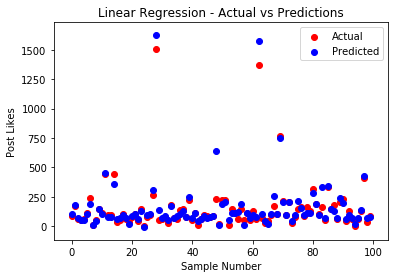

In [17]:
X_grid = np.arange(0, len(X_test))
X_grid = X_grid.reshape((len(X_grid), 1))
y_pred = lin_regressor.predict(X_test)
plot1 = plt.scatter(X_grid, y_test, color = 'red', label='Actual')
plot2 = plt.scatter(X_grid, y_pred, color = 'blue', label='Predicted')
plt.title('Linear Regression - Actual vs Predictions')
plt.xlabel('Sample Number')
plt.ylabel('Post Likes')
plt.legend()
plt.show()

C:\Users\ryanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


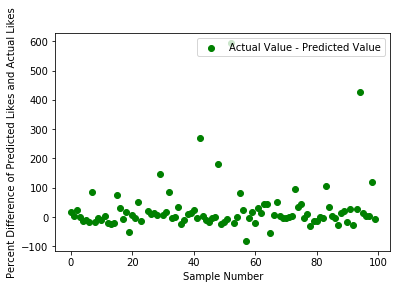

In [18]:
plot1.remove()
plot2.remove()
plt.scatter(X_grid, ((y_pred - y_test) / y_test) * 100, color='green', label='Actual Value - Predicted Value')
plt.xlabel('Sample Number')
plt.ylabel('Percent Difference of Predicted Likes and Actual Likes')
plt.legend()

## Discussion

<p>As seen in the <a href=#Predictions>Predictions and Evaluation section</a>, Linear Regression performed the best out of our three models with an R-Squared Score of 0.930. This ranks significantly higher than Support Vector Regression's score of -0.004 and Random Forest Regression's score of 0.621. The reasons for this disparity can be numerous; however, one factor that may add to the likelihood of this relationship is that people who have achieved prior success with posts and comments are more likely to create new posts and comments that are able to attract a large audience. In this sense, a linear relationship is not unimaginable between our training features and the predicted value of likes.</p>